## ES和用户的地理位置分布

In [1]:
from simulator import env
from simulator.config import CANVAS_SIZE_X,CANVAS_SIZE_Y
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle

Load ./models/cache_agent/0/D3QN_q_eval.pth successfully!
Load ./models/cache_agent/0/D3QN_q_target.pth successfully!
Load ./models/maintainance_agent/0/D3QN_q_eval.pth successfully!
Load ./models/maintainance_agent/0/D3QN_q_target.pth successfully!
Load ./models/cache_agent/1/D3QN_q_eval.pth successfully!
Load ./models/cache_agent/1/D3QN_q_target.pth successfully!
Load ./models/maintainance_agent/1/D3QN_q_eval.pth successfully!
Load ./models/maintainance_agent/1/D3QN_q_target.pth successfully!
Load ./models/cache_agent/2/D3QN_q_eval.pth successfully!
Load ./models/cache_agent/2/D3QN_q_target.pth successfully!
Load ./models/maintainance_agent/2/D3QN_q_eval.pth successfully!
Load ./models/maintainance_agent/2/D3QN_q_target.pth successfully!
Load ./models/cache_agent/3/D3QN_q_eval.pth successfully!
Load ./models/cache_agent/3/D3QN_q_target.pth successfully!
Load ./models/maintainance_agent/3/D3QN_q_eval.pth successfully!
Load ./models/maintainance_agent/3/D3QN_q_target.pth successfully!


In [29]:
#env.reset()

with open('./figures/env.pkl', 'rb') as f:
    env = pickle.load(f)

In [28]:

for id, es in env.edge_servers.items():
    es.cache_agent= None
    es.maintainance_agent = None

env.writer = None

# 保存
with open('./figures/env.pkl', 'wb') as f:
    pickle.dump(env, f)

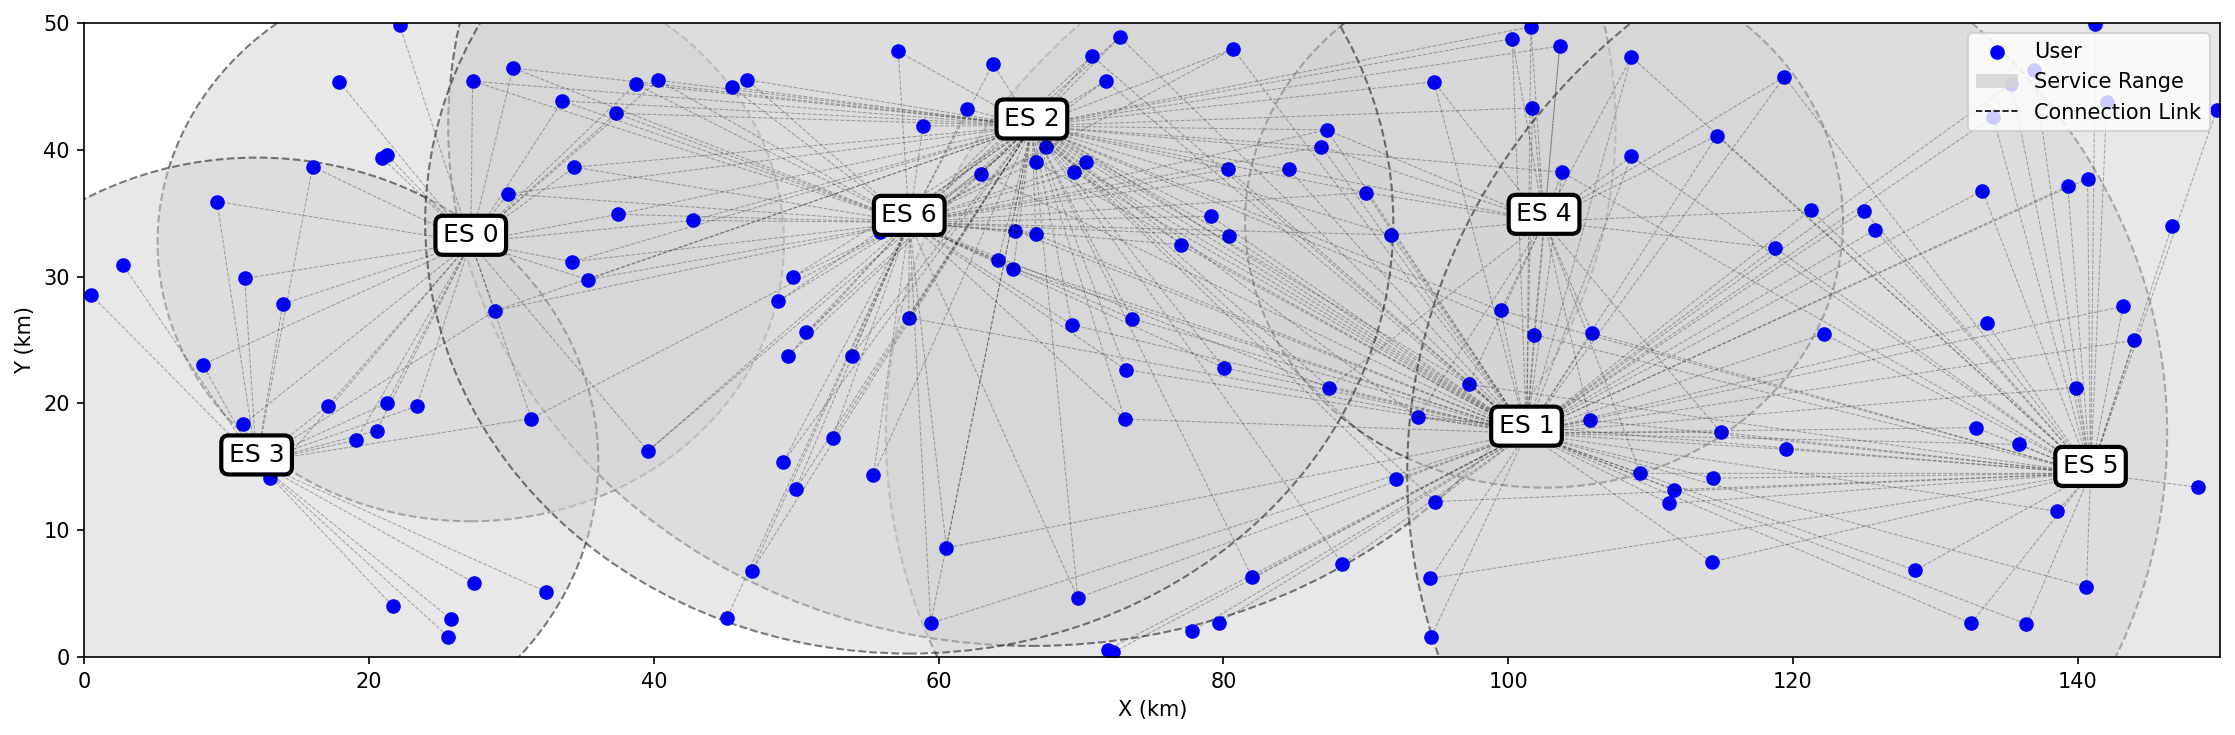

In [32]:
plt.figure(figsize=(CANVAS_SIZE_X/10, CANVAS_SIZE_Y/10), dpi=150)

for id, es in env.edge_servers.items():
    x, y = es.location
    range = es.service_range
    circle = plt.Circle((x, y), range,
                        facecolor='lightgrey',
                        alpha=0.5,
                        edgecolor='black',
                        fill=True, linestyle='--')
    plt.gcf().gca().add_artist(circle)

#for id, es in env.edge_servers.items():
#    x, y = es.location
#    plt.scatter(x, y, marker='x', color='red', label="Edge Server")


for user in env.users:
    x, y = user.location
    plt.scatter(x, y, marker='o', color='blue', label="User")
    servers = user.find_nearby_servers(env)
    for es, distance in servers:
        plt.plot([es.location[0], user.location[0]],
                 [es.location[1], user.location[1]],
                 color='black', linestyle='--',
                 alpha=0.3,
                 linewidth=0.5)

for id, es in env.edge_servers.items():
    x, y = es.location
    text_x, text_y = x, y  # 提示：这里去掉这一行
    text_box = plt.text(text_x, text_y, f"ES {id}", ha='center', fontsize=12)
    bbox_props = dict(boxstyle='round,pad=0.3',
                      fc='white', ec='black', lw=2)  # 设置文本框样式
    # 调整文本框位置，使其在圆形顶部
    text_box.set_bbox(bbox_props)
    text_box.set_position((x, y))

plt.legend(handles=[
    plt.scatter([], [], marker='o', color='blue', label="User"),
    mpatches.Rectangle((0,0), 1, 1, fc="lightgrey",alpha=0.8, label="Service Range"),
    plt.Line2D([], [], color='black', linestyle='--',
               linewidth=0.8, label="Connection Link")
    #plt.Circle((0,0),1,fill=False,label="Service Range")
], loc='upper right')
plt.xlim(0, CANVAS_SIZE_X)
plt.ylim(0, CANVAS_SIZE_Y)
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.tight_layout()
#plt.show()

plt.savefig("./figures/es_distribution.png", dpi=150)

In [33]:
for id, es in env.edge_servers.items():
    print(es.description)

# 每个边缘服务器的范围内的用户数量
res = {}
for id, es in env.edge_servers.items():
    res[id] = 0

for user in env.users:
    servers = user.find_nearby_servers(env)
    for es, distance in servers:
        res[es.id] += 1

print(res)


EdgeServer id：0
Max connections: 197
Location: (27.136266740297334, 32.707280329396596)
Faulty: False
Service range: 22 km
Storage (memory, SSD, HDD): (16, 256, 1000) GB
Storage speed (memory, SSD, HDD): (21000, 885, 271) mB/s
Bandwidth: 3311.59580574358 mB/s
Speed limit: -1 mB/s
Stablity: 1

EdgeServer id：1
Max connections: 185
Location: (101.29033024722284, 17.65732377238093)
Faulty: False
Service range: 45 km
Storage (memory, SSD, HDD): (8, 32, 1000) GB
Storage speed (memory, SSD, HDD): (8000, 1024, 206) mB/s
Bandwidth: 7529.599393430877 mB/s
Speed limit: -1 mB/s
Stablity: 1

EdgeServer id：2
Max connections: 142
Location: (66.5487095645409, 41.879136817387284)
Faulty: False
Service range: 41 km
Storage (memory, SSD, HDD): (4, 32, 700) GB
Storage speed (memory, SSD, HDD): (12000, 1456, 273) mB/s
Bandwidth: 6480.548508994145 mB/s
Speed limit: -1 mB/s
Stablity: 1

EdgeServer id：3
Max connections: 112
Location: (12.093840723493528, 15.387354541812845)
Faulty: False
Service range: 24 km


## RL收敛